**K-Means CLUSTERING!! - 360DIGITMG**

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points.
Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
    2. The defined number of iterations has been achieved.

K-Means Clustering problem 1:

    Analyze the information given in the following ‘Insurance Policy dataset’ to create clusters 
    of persons falling in the same type. Refer to Insurance Dataset.csv.

As a first step towards your solution, we need to understand the data and hence we load the same and the libbraries required

In [1]:
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

ins = pd.read_csv("Insurance Dataset.csv")

In [2]:
ins.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


In [3]:
# We see the columns in the dataset
ins.columns

Index(['Premiums Paid', 'Age', 'Days to Renew', 'Claims made', 'Income'], dtype='object')

In [4]:
ins.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income
0,2800,26,233,3890.076336,28000
1,2950,27,130,2294.444444,29500
2,3100,28,144,2564.545455,31000
3,3250,30,65,1978.260870,32500
4,3400,32,56,2009.090909,34000


**Data Description:**

The file Insurance Dataset contains information on Insurance details of the people and the idea is to create a group of people based on the features given below:

Premiums Paid -- Premium being paid by the Insured

Age - Age of the Insured person

Days to Renew -- Days left to renew the Insurance policy

Claims made -- Claims made by the Insured, if any

Income - Income bracket of the Insured person

In [5]:
# As a part of the Data cleansing we check the data for any missing/ na values
ins.isna().sum()

Premiums Paid    0
Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64

In [6]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
ins1 = ins.duplicated()
sum(ins1)

0

In [7]:
# We see the data again now to check whether the data is in scale
ins.describe

# we notice that the data needs to be normalise, using normalization

<bound method NDFrame.describe of     Premiums Paid  Age  Days to Renew   Claims made  Income
0            2800   26            233   3890.076336   28000
1            2950   27            130   2294.444444   29500
2            3100   28            144   2564.545455   31000
3            3250   30             65   1978.260870   32500
4            3400   32             56   2009.090909   34000
..            ...  ...            ...           ...     ...
95          25575   63             76  16161.979170  170500
96          25800   62            166  23715.151520  172000
97          26025   59            167  24043.401020  173500
98          26250   58            245  40147.058820  175000
99          26475   52            261  46781.067960  176500

[100 rows x 5 columns]>

In [8]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(ins.iloc[:,:])

Premiums Paid    -0.134543
Age              -0.287800
Days to Renew    -0.786621
Claims made      17.254497
Income           -1.200000
dtype: float64

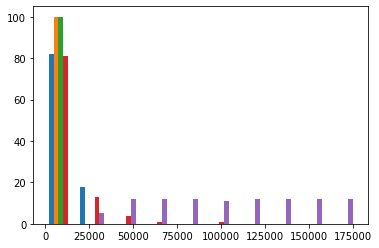

In [9]:
##########################Univariate, Bivariate################
plt.hist(ins)   #Univariate

ins.skew(axis = 0, skipna = True) 

ins.kurtosis(axis = 0, skipna = True)

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

    1. Centroids of newly formed clusters do not change
    2. Points remain in the same cluster
    3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot. 

In [10]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[18.56906591852995,
 14.476922604427537,
 10.79969226270363,
 8.989738347778546,
 7.329507252294512,
 6.575686222342304]

Text(0, 0.5, 'total_within_SS')

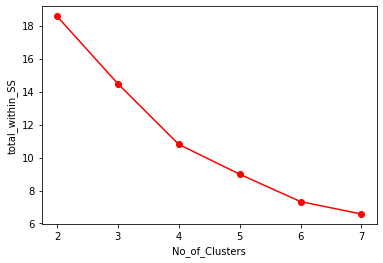

In [11]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [12]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4

model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [13]:
model.labels_ # getting the labels of clusters assigned to each row

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [14]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [15]:
ins['clust'] = mb # creating a  new column and assigning it to new column 

In [16]:
ins.head()

,Premiums Paid,Age,Days to Renew,Claims made,Income,clust
0,2800,26,233,3890.076336,28000,3
1,2950,27,130,2294.444444,29500,2
2,3100,28,144,2564.545455,31000,2
3,3250,30,65,1978.260870,32500,2
4,3400,32,56,2009.090909,34000,2


In [17]:
ins = ins.iloc[:,[5,0,1,2,3,4]]
ins.head()

,clust,Premiums Paid,Age,Days to Renew,Claims made,Income
0,3,2800,26,233,3890.076336,28000
1,2,2950,27,130,2294.444444,29500
2,2,3100,28,144,2564.545455,31000
3,2,3250,30,65,1978.260870,32500
4,2,3400,32,56,2009.090909,34000


In [18]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters

In [19]:
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 4 nos of clear cluster formed
ins.iloc[:, 1:6].groupby(ins.clust).mean()

,Premiums Paid,Age,Days to Renew,Claims made,Income
clust,,,,,
0,23973.611111,61.944444,164.222222,28517.724814,158083.333333
1,13441.666667,44.250000,69.527778,8490.919439,121125.000000
2,5618.750000,37.708333,60.541667,3359.967387,52750.000000
3,9270.454545,45.363636,233.090909,16284.907860,79681.818182


We can now clearly see the 4 number of clusters formed, which can be described as under

 1. Cluster1, "0" = Defines the group of People who have high income and pay high premiums with average age of 60
                      
 2. Cluster2, "1" = Defines the group of People who have relative high income and pay high premiums with average age of 44
   
 3. Cluster4, "3" = Defines the group of People who have lesser income and pay medium premiums with average age of 45
                      
 4. Cluster3, "2" = Defines the group of People who have low income and pay lowest premiums with average age of 37